Parte 1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve

In [2]:
data = pd.read_csv('Heart.csv', delimiter = ';')
data = data.drop(data[data.ca == '?'].index)
data = data.drop(data[data.thal == '?'].index)
X = data.drop(['num'], axis = 1)
y = data['num']
y = y.replace(to_replace = [1,2,3,4], value = 1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
y_test = np.array(y_test)

In [4]:
error_rate_bc = np.zeros(300)
error_rate_oob_bc = np.zeros(300)
error_rate_rf = np.zeros(300)
error_rate_oob_rf = np.zeros(300)
for i in range(1, 301):
    bc = BaggingClassifier(n_estimators = i, oob_score = True)
    rf = RandomForestClassifier(n_estimators = i, oob_score = True)
    bc.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    y_pred_bc = bc.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    ii1 = (y_test == y_pred_bc)
    error_rate_bc[i-1] = len(ii1[ii1 == False])/len(y_test)
    error_rate_oob_bc[i-1] = 1 - bc.oob_score_
    ii2 = (y_test == y_pred_rf)
    error_rate_rf[i-1] = len(ii2[ii2 == False])/len(y_test)
    error_rate_oob_rf[i-1] = 1 - rf.oob_score_

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:611: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few est

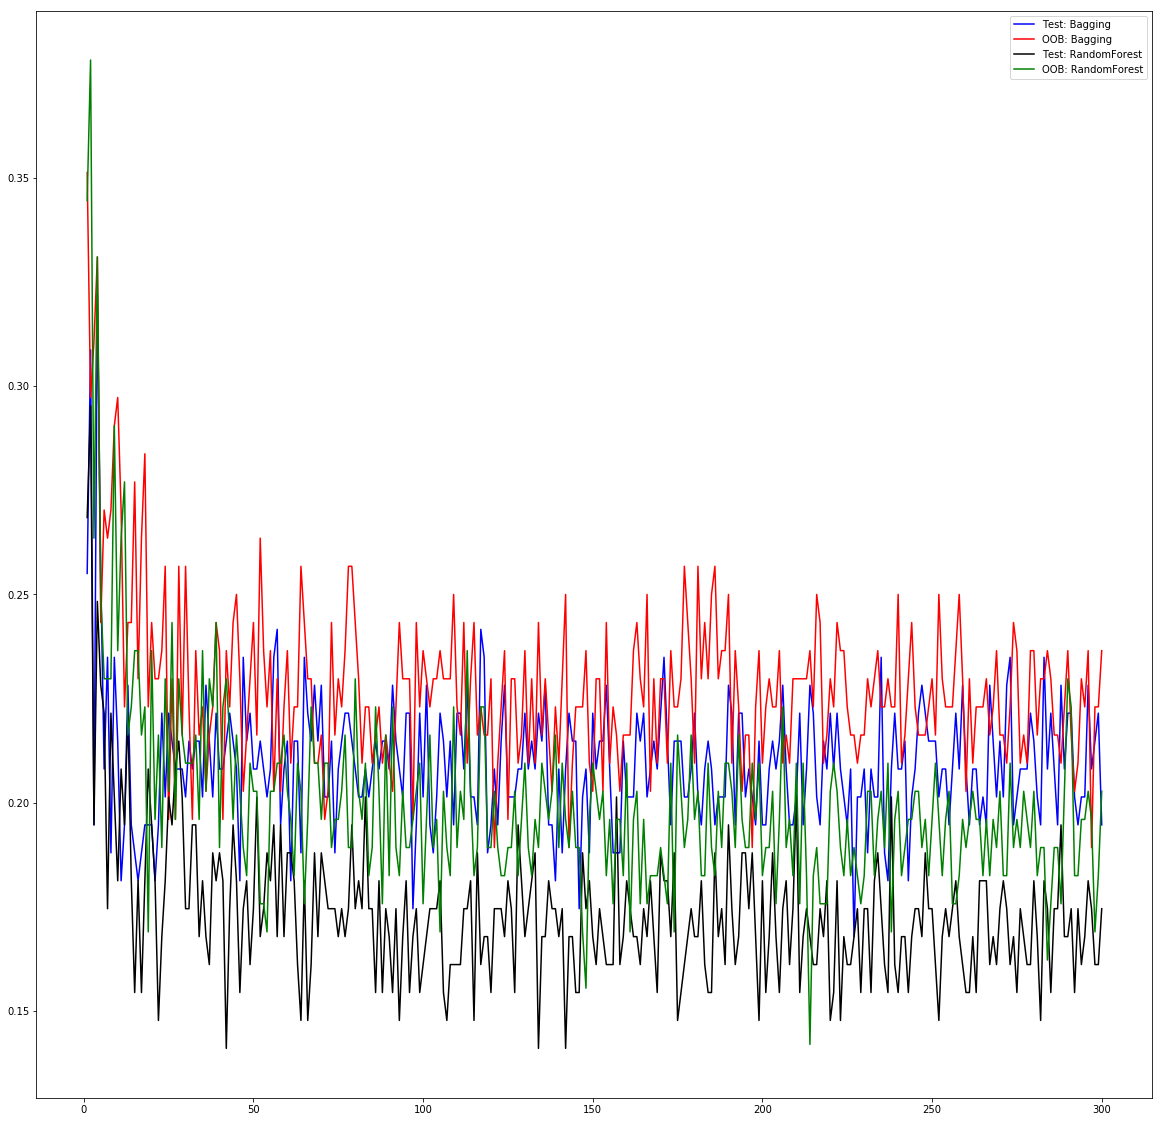

In [8]:
plt.figure(figsize = [20,20])
plt.plot(range(1,301), error_rate_bc, color = 'blue', label = 'Test: Bagging')
plt.plot(range(1,301), error_rate_oob_bc, color = 'red', label = 'OOB: Bagging')
plt.plot(range(1,301), error_rate_rf, color = 'black', label = 'Test: RandomForest')
plt.plot(range(1,301), error_rate_oob_rf, color = 'green', label = 'OOB: RandomForest')
plt.legend()

In [14]:
dat = pd.read_csv('OJ.csv')
dat = dat.drop(['Store7'], axis = 1)
X = dat.drop(['Purchase'], axis = 1)
y = dat['Purchase']
y = y.replace(to_replace = 'CH', value = 0)
y = y.replace(to_replace = 'MM', value = 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
y_test = np.array(y_test)

In [19]:
error_rate1 = np.zeros(300)
error_rate2 = np.zeros(300)
error_rate3 = np.zeros(300)
h = len(X.columns)//2
for i in range(1, 301):
    rf1 = RandomForestClassifier(n_estimators = i, max_features = None)
    rf2 = RandomForestClassifier(n_estimators = i, max_features = h)
    rf3 = RandomForestClassifier(n_estimators = i)
    
    rf1.fit(X_train, y_train)
    rf2.fit(X_train, y_train)
    rf3.fit(X_train, y_train)
    
    y_pred_rf1 = rf1.predict(X_test)
    y_pred_rf2 = rf2.predict(X_test)
    y_pred_rf3 = rf3.predict(X_test)
    
    ii1 = (y_test == y_pred_rf1)
    error_rate1[i-1] = len(ii1[ii1 == False])/len(y_test)
    ii2 = (y_test == y_pred_rf2)
    error_rate2[i-1] = len(ii2[ii2 == False])/len(y_test)
    ii3 = (y_test == y_pred_rf3)
    error_rate3[i-1] = len(ii3[ii3 == False])/len(y_test)

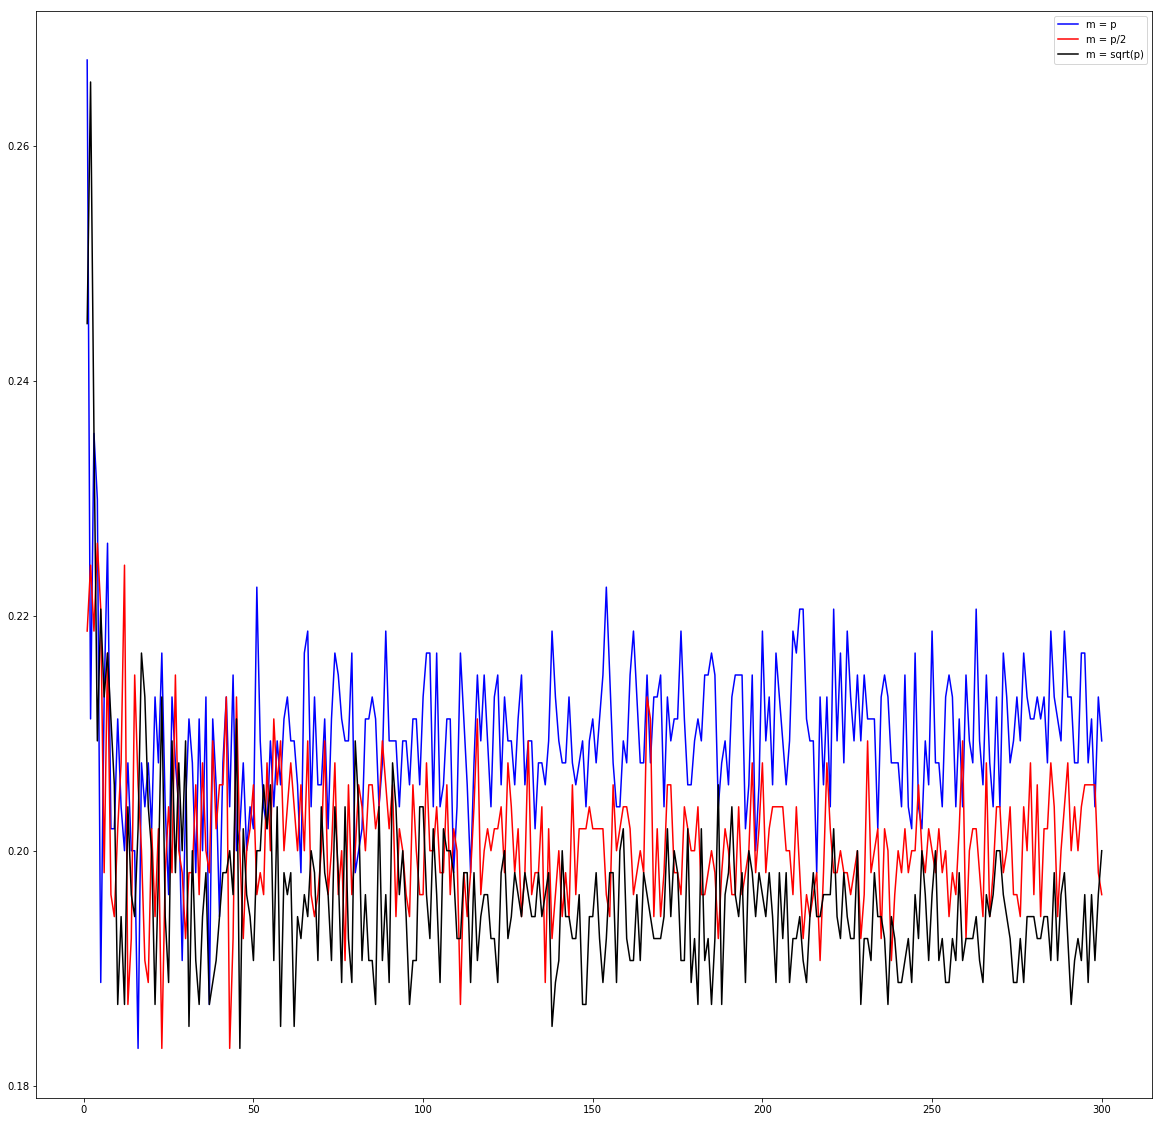

In [20]:
plt.figure(figsize = [20,20])
plt.plot(range(1,301), error_rate1, color = 'blue', label = 'm = p')
plt.plot(range(1,301), error_rate2, color = 'red', label = 'm = p/2')
plt.plot(range(1,301), error_rate3, color = 'black', label = 'm = sqrt(p)')
plt.legend()

Parte 2

In [3]:
dat = pd.read_csv('OJ.csv')
dat = dat.drop(['Store7'], axis = 1)
X = dat.drop(['Purchase'], axis = 1)
y = dat['Purchase']
y = y.replace(to_replace = 'CH', value = 0)
y = y.replace(to_replace = 'MM', value = 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
y_test = np.array(y_test)

In [25]:
l = LogisticRegression()
lda = LinearDiscriminantAnalysis()
t = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators = 500)

In [26]:
l.fit(X_train, y_train)
lda.fit(X_train, y_train)
t.fit(X_train, y_train)
rf.fit(X_train, y_train)

/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
pr_l = precision_recall_curve(y_test, l.predict_proba(X_test)[:,1])
pr_lda = precision_recall_curve(y_test, lda.predict_proba(X_test)[:,1])
pr_t = precision_recall_curve(y_test, t.predict_proba(X_test)[:,1])
pr_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])

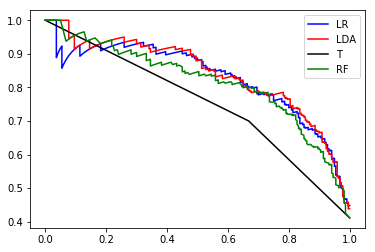

In [28]:
plt.plot(pr_l[1], pr_l[0], color = 'blue', label = 'LR')
plt.plot(pr_lda[1], pr_lda[0], color = 'red', label = 'LDA')
plt.plot(pr_t[1], pr_t[0], color = 'black', label = 'T')
plt.plot(pr_rf[1], pr_rf[0], color = 'green', label = 'RF')
plt.legend()